In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

from preprocess import get_data

In [15]:
# Load and preprocess data
data = get_data()

# Extract features
X = data["values"]
X

# Function to rename labels
# def rename_labels(labels: np.array) -> np.array:
#     transformed_labels = np.zeros_like(labels)
    
#     # Apply the transformation logic
#     transformed_labels[(labels == 1) | (labels == 2) | (labels == 3)] = 1  # seizure or risk
#     return transformed_labels # (labels == 4) | (labels == 5)                without risk

# # Extract and transform labels
# Y = rename_labels(data["labels"])
Y = data["labels"]

In [16]:
# Split for train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Scale and normalize data
scaler =  StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

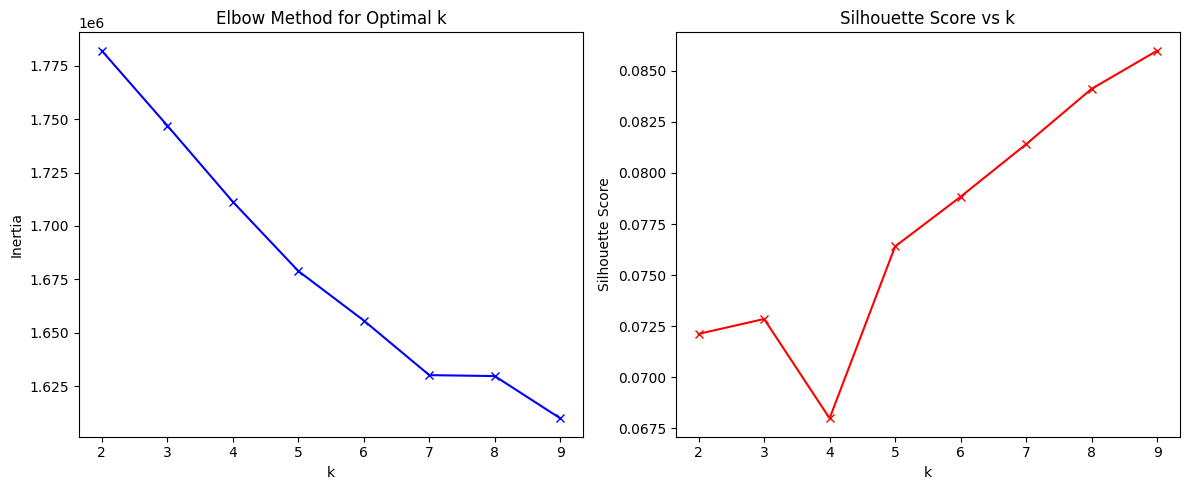

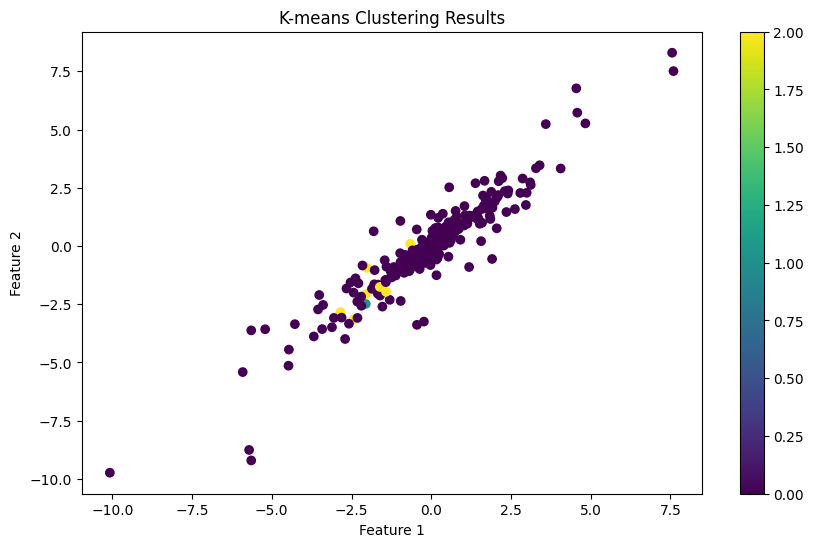


Comparison of actual labels vs cluster assignments:
Predicted Cluster    0  1  2
Actual                      
1                  215  1  8
2                  231  0  0
3                  228  0  0
4                  238  0  0
5                  218  0  0

Final Silhouette Score: 0.643


In [17]:
# Find optimal number of clusters using elbow method
inertias = []
silhouette_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train_scaled, kmeans.labels_))

# Plot elbow curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.tight_layout()
plt.show()

# Apply K-means with optimal k (let's use k=3 since we know there are 3 wine classes)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_test_scaled)

# Visualize clustering results using first two features
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.colorbar(scatter)
plt.show()

# Compare with original labels
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted Cluster': clusters
})
print("\nComparison of actual labels vs cluster assignments:")
print(pd.crosstab(comparison_df['Actual'], comparison_df['Predicted Cluster']))

# Calculate silhouette score for final model
final_silhouette = silhouette_score(X_test_scaled, clusters)
print(f"\nFinal Silhouette Score: {final_silhouette:.3f}")